In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_preprocessed.csv')
test = pd.read_csv(filepath_home+'test_preprocessed.csv')

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [4]:
tp_cols = ['tp'+'0'*(2-len(str(i)))+str(i) for i in range(1,11)]
tp_data = data[tp_cols].copy()

In [5]:
tp_data['all_filled'] = tp_data.apply(lambda x: 1 if 7 not in x.values else 0 , axis=1) 

In [6]:
tp_data.all_filled.sum()

55800

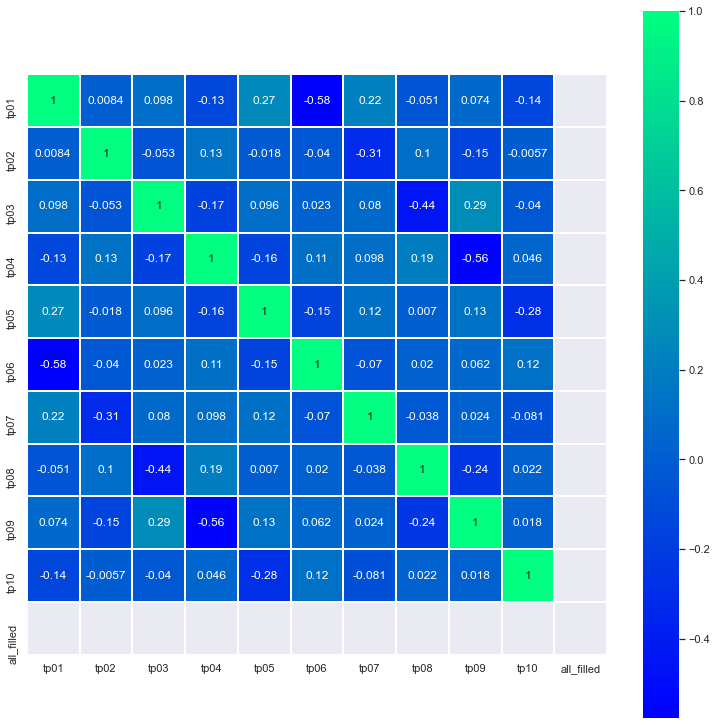

In [7]:
corr = tp_data[tp_data.all_filled==1].corr(method='spearman')
low = corr.min().min()
high = corr.max().max()
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='winter',
           annot=True,
           linewidths=1)

### 질문이 2개씩 묶여 서로 유의미한 상관관계를 보임

In [8]:
tp_data[['tp02','tp04','tp06','tp08','tp10']]= 6-tp_data[['tp02','tp04','tp06','tp08','tp10']]

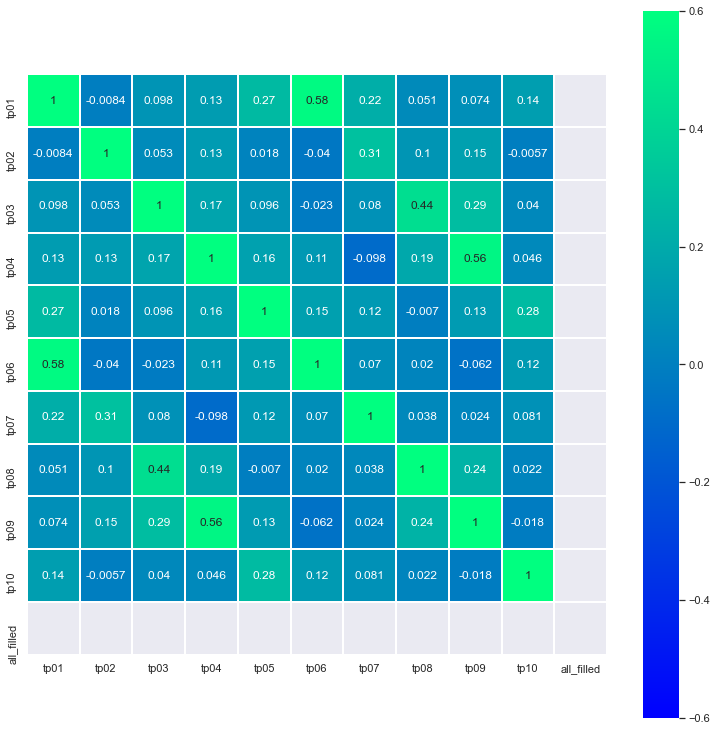

In [9]:
corr = tp_data[tp_data.all_filled==1].corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=-0.6,
            vmax=0.6,
            cmap='winter',
           annot=True,
           linewidths=1)

In [10]:
tp_data['Extraversion']=(tp_data.tp01+tp_data.tp06)/2
tp_data['Agreeableness']=(tp_data.tp02+tp_data.tp07)/2
tp_data['Conscientiousness']=(tp_data.tp03+tp_data.tp08)/2
tp_data['Emotional Stability']=(tp_data.tp04+tp_data.tp09)/2
tp_data['Openness to Experiences']=(tp_data.tp05+tp_data.tp10)/2

In [11]:
tipi_threshold_table = {
    'Male':{
        '10s':[3.79,4.47,4.41,4.61,5.43],
        '20s':[3.73,4.5,4.57,4.64,5.49],
        '30s':[3.81,4.55,4.77,4.63,5.49],
        '40s':[3.85,4.7,4.96,4.72,5.41],
        '50s':[3.87,4.89,5.11,4.8,5.39],
        '60s':[3.85,4.95,5.26,4.92,5.37],
        '+70s':[4.21,5.5,5.39,4.84,5.39]
    },
    'Female':{
        '10s':[4.06,4.73,4.52,4.07,5.58],
        '20s':[4.07,4.88,4.78,4.09,5.55],
        '30s':[4.17,5.04,4.97,4.25,5.49],
        '40s':[4.2,5.28,5.18,4.49,5.46],
        '50s':[4.18,5.43,5.35,4.66,5.42],
        '60s':[4.21,5.5,5.39,4.84,5.39],
        '+70s':[4.21,5.5,5.39,4.84,5.39]
    }
}

In [12]:
big_five_personality = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']

def binarize_big_5_personality(row):
    for idx,col in enumerate(big_five_personality):
        threshold = tipi_threshold_table[row.gender][row.age_group][idx]
        row[col] = 1 if row[col]>=threshold else 0
    return row

for col in big_five_personality:
    tp_data[col] = np.where(tp_data[col]>tp_data[col].mean(),1,0)

In [13]:
sample = tp_data[big_five_personality][:split_point].join(train['voted'])

In [14]:
sample.groupby(big_five_personality)['voted'].mean().unstack()

Openness to Experiences                                                  0  \
Extraversion Agreeableness Conscientiousness Emotional Stability             
0            0             0                 0                    1.433415   
                                             1                    1.511704   
                           1                 0                    1.510398   
                                             1                    1.583429   
             1             0                 0                    1.498239   
                                             1                    1.526701   
                           1                 0                    1.585479   
                                             1                    1.597574   
1            0             0                 0                    1.467386   
                                             1                    1.545263   
                           1                 0                    1.535310   
                                             1                    1.579428   
             1             0                 0                    1.535733   
                                             1                    1.561762   
                           1                 0                    1.619385   
                                             1                    1.645401   

Openness to Experiences                                                  1  
Extraversion Agreeableness Conscientiousness Emotional Stability            
0            0             0                 0                    1.454792  
                                             1                    1.504261  
                           1                 0                    1.549393  
                                             1                    1.601429  
             1             0                 0                    1.524378  
                                             1                    1.510471  
                           1                 0                    1.609375  
                                             1                    1.633188  
1            0             0                 0                    1.477397  
                                             1                    1.545375  
                           1                 0                    1.530151  
                                             1                    1.618557  
             1             0                 0                    1.539765  
                                             1                    1.582494  
                           1                 0                    1.649474  
                                             1                    1.655265

In [15]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
data[total_negative_cols] = 6-data[total_negative_cols]
data['mach_score'] = data.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)
data = data.join(tp_data[big_five_personality])

In [17]:
data.mach_score.value_counts()

3.80    1297
3.50    1246
3.00    1231
3.15    1219
3.20    1213
        ... 
1.25      19
1.00       8
1.10       7
1.15       7
1.05       3
Name: mach_score, Length: 81, dtype: int64

In [18]:
data.groupby(big_five_personality[0])['mach_score'].mean()

Extraversion
0    3.293314
1    3.412602
Name: mach_score, dtype: float64

In [19]:
data.groupby(big_five_personality[1])['mach_score'].mean()

Agreeableness
0    3.030815
1    3.680946
Name: mach_score, dtype: float64

In [20]:
data.groupby(big_five_personality[2])['mach_score'].mean()

Conscientiousness
0    3.286733
1    3.433903
Name: mach_score, dtype: float64

In [21]:
data.groupby(big_five_personality[3])['mach_score'].mean()

Emotional Stability
0    3.355146
1    3.352741
Name: mach_score, dtype: float64

In [22]:
data.groupby(big_five_personality[4])['mach_score'].mean()

Openness to Experiences
0    3.346157
1    3.367074
Name: mach_score, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x = sample.drop(['voted'],axis=1)
y = sample.voted

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)